In [1]:
from gprm.datasets import Seafloor 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygmt

%load_ext autoreload
%autoreload 2


/Users/Simon/GIT/GPlatesReconstructionModel/gprm/utils/proximity.py:10: UserWarning: gprm.utils.proximity functions based on xrspatial not available
  warnings.warn('gprm.utils.proximity functions based on xrspatial not available')


In [2]:
PHT = Seafloor.PacificSeamountAges(catalogue='2021')

PHT

Long    Lat  Average_Age_Ma  Average_Age_Error_Ma Type  Ref  \
0    209.26 -23.43            0.23                 0.004    K   R0   
1    208.70 -22.45            1.16                 0.005    A   R9   
2    202.65 -20.12            6.06                 0.360    K  R10   
3    200.25 -18.90            9.53                 0.080    A   R9   
4    201.90 -20.00           10.34                 1.240    K  R10   
..      ...    ...             ...                   ...  ...  ...   
414  208.25 -16.50            3.18                 0.020    K   R0   
415  208.25 -16.50            3.84                 0.050    K   R0   
416  208.20 -16.25            3.66                 0.130    K   R0   
417  207.75 -16.45            4.23                 0.030    K   R0   
418  207.75 -16.45            4.87                 0.100    K   R0   

                SampleName Tag SeamountChain                 geometry  
0            Arago-1(DR07)  RU        Rurutu  POINT (209.260 -23.430)  
1    Rurutu-1(DT79-RUR-91)  RU        Rurutu  POINT (208.700 -22.450)  
2                    Mauke  RU        Rurutu  POINT (202.650 -20.120)  
3    Aitutaki(DT77-AIT-36)  RU        Rurutu  POINT (200.250 -18.900)  
4                     Atiu  RU        Rurutu  POINT (201.900 -20.000)  
..                     ...  ..           ...                      ...  
414            Bora_Bora-1  SO       Society  POINT (208.250 -16.500)  
415            Bora_Bora-2  SO       Society  POINT (208.250 -16.500)  
416                  Tupai  SO       Society  POINT (208.200 -16.250)  
417              Maupiti-1  SO       Society  POINT (207.750 -16.450)  
418              Maupiti-2  SO       Society  POINT (207.750 -16.450)  

[419 rows x 10 columns]

In [3]:
sio = Seafloor.Seamounts('SIO_good')
sio #.plot()


Long        Lat  Height   Radius   Base_Depth        Name  \
0       2.858333  -6.591667     900   6.5502 -5419.895020    KW-00134   
1      -0.025000  -3.875000    2400  17.4672 -4418.163086    KW-00137   
2       0.391667  -3.358333    1900  13.8282 -4252.924316    KW-00140   
3      -4.091667  -1.608333    1500  10.9170 -5056.730957    KW-00154   
4      -0.558333  -3.258333    1700  12.3726 -4418.627930    KW-00156   
...          ...        ...     ...      ...          ...         ...   
39377 -19.875000 -33.725000    1900  13.8282 -3602.549072  SIO2-08564   
39378 -20.825000 -34.141667    1400  10.1892 -3774.492188  SIO2-08565   
39379 -16.975000 -34.758333    1200   8.7336 -3354.338135  SIO2-08566   
39380 -20.108333 -56.925000    1500  10.9170 -4634.202637  SIO2-08567   
39381 -18.058333 -58.641667    1500  10.9170 -4025.723145  SIO2-08569   

       Charted                     geometry  
0            1     POINT (2.85833 -6.59167)  
1            1    POINT (-0.02500 -3.87500)  
2            1     POINT (0.39167 -3.35833)  
3            1    POINT (-4.09167 -1.60833)  
4            1    POINT (-0.55833 -3.25833)  
...        ...                          ...  
39377        0  POINT (-19.87500 -33.72500)  
39378        0  POINT (-20.82500 -34.14167)  
39379        0  POINT (-16.97500 -34.75833)  
39380        0  POINT (-20.10833 -56.92500)  
39381        0  POINT (-18.05833 -58.64167)  

[39382 rows x 8 columns]

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SYNBATH Earth Relief v2.0 original at 15x15 arc seconds [Sandwell et al., 2023].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_synbath_15s_p): S50E130


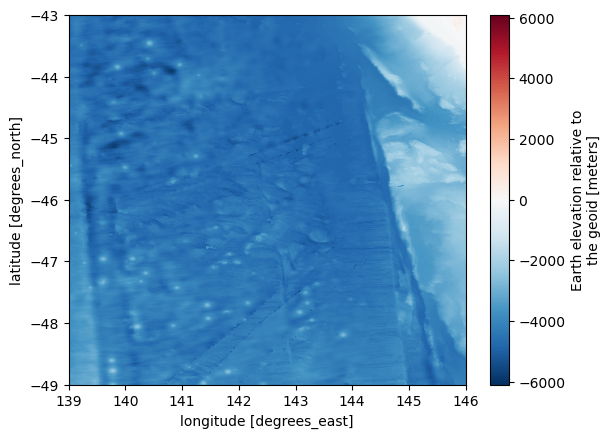

In [4]:
#region = [160,200,15,40]
#region = [-98,-93,-5,-2] # Galapagos, as in Sandwell paper
#region = [90,103,-38,-32] # MH370
#region = [130,145,-50,-44] # SOTS
region = [139,146,-49,-43] # SOTS

sb = pygmt.datasets.load_earth_relief(resolution='15s', region=region, data_source='synbath')

sb.plot()


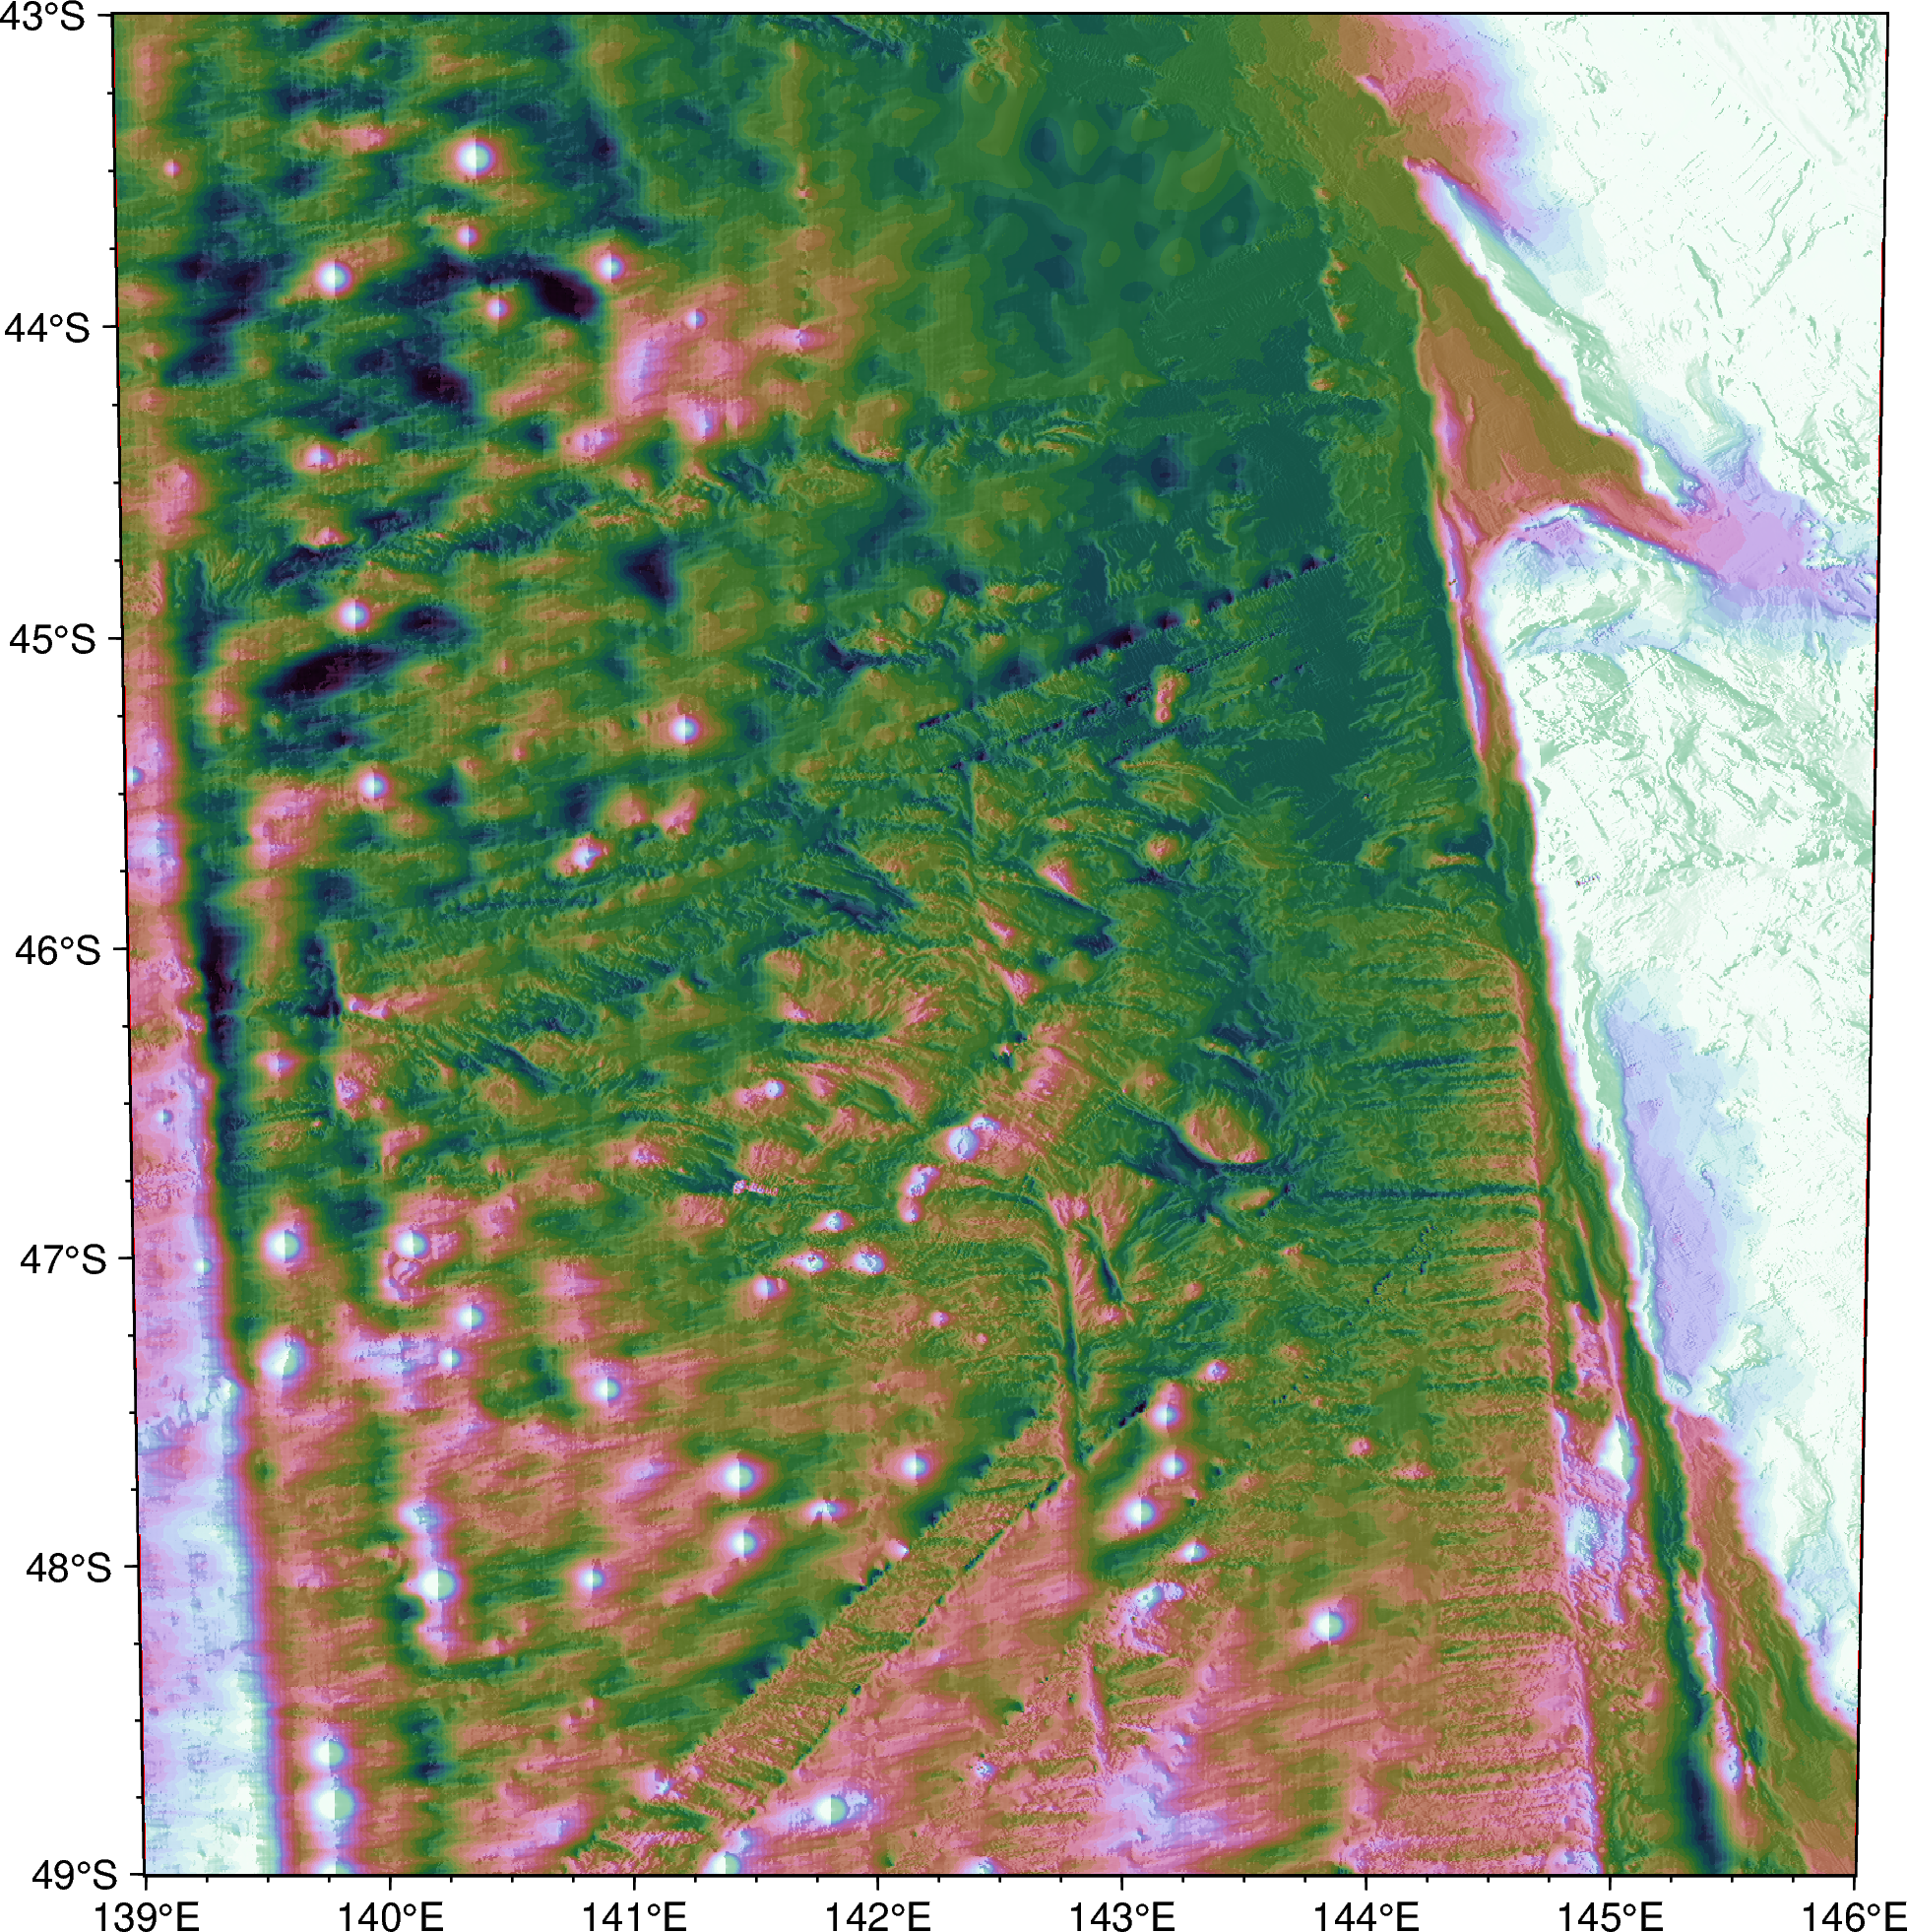

In [12]:
#sb.plot()

#region = [170,190,15,25]

fig = pygmt.Figure()
fig.basemap(region=region, projection='N6i', frame='afg')
shade = pygmt.grdgradient(grid=sb, normalize='e0.25', azimuth='225/315')
cmap = pygmt.makecpt(cmap='cubhelix', series=[-5500,-3000,100], background='o')
fig.grdimage(sb, shading=shade)
#fig.plot(sio, style='c0.05c', fill='magenta', pen='black')
#fig.plot(data=PHT, style="c0.2c", pen='black', fill='red')
fig.show(width=1500)

#shade.plot()

In [6]:
import xrft
res = xrft.fft(sb)

#def spec2(mag):
#
#    T = np.fft.fft2(mag)
#    S = T * np.conj(T)
#    return np.fft.fftshift(S)

1680 1440
0
(1680,) (1440,)


/opt/anaconda3/envs/pygmt9/lib/python3.8/site-packages/xrft/xrft.py:1054: FutureWarning: Isotropic wavenumber larger than the Nyquist wavenumber may result.
  warnings.warn(msg, FutureWarning)


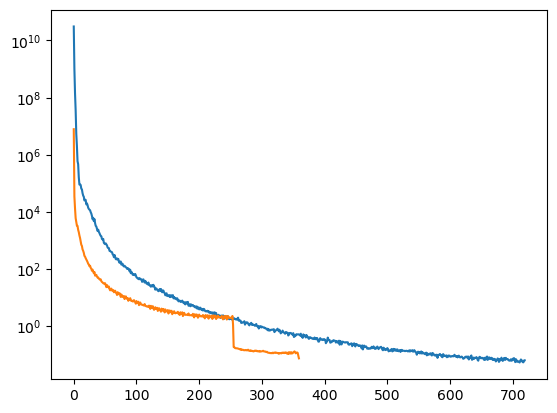

In [7]:
from scipy import interpolate

def rpsinterp(S,dx):
    """
    % [Sra,dr,Rs] = rps (S,dx)
    %   Sra is the Radially Averaged Power Spectrum of the spectrum S, evaluated at points
    %   along lines extending radially outwards from the centre of the 2D spectrum at, at 1
    %   degree increments. Linear interpolation is used to map spectrum onto these points. The
    %   radial wavenumber increment is given by dr (in radians/distance unit), based on the
    %   input data spacing dg
    """

    ny,nx = S.shape
    nr = int(np.floor(np.min((nx,ny))/2))
    na = int(360)   #%% number of angles - hardwired in to code, could be altered??

    R = np.zeros((na,nr))
    dr = 2*np.pi/(dx*(nx-1))
    Rad = np.tile(np.arange(0,nr),(na,1))      # points onto which we will sample radial spectrum,
                                  # defined by angle and distance from
                                  # centre of spectrum
    da = 2*np.pi/(na);
    A = np.tile(da*np.arange(0,na), (nr,1)).T
    
    nx2 = np.floor(nx/2)
    ny2 = np.floor(ny/2)
    print(nx,ny)
    print(is_odd(nx))
    if is_odd(nx):
        Wx=np.arange(-nx2,nx2+1) 
    else: 
        Wx=np.arange(-nx2,nx2)
    if is_odd(ny): 
        Wy=np.arange(-ny2,ny2+1)
    else: 
        Wy=np.arange(-ny2,ny2)
    print(Wx.shape, Wy.shape)

    Vxi = Rad*np.cos(A)
    Vyi = Rad*np.sin(A)
    #% NB in next line, switched Vxi and Vyi so that Angular spectrum starts at
    #% 0 degrees
    f = interpolate.RectBivariateSpline(Wy,Wx,S)
    Rs = f.ev(Vyi,Vxi)
    #Rs = interp2(Wx,Wy,S,Vyi,Vxi);      #%% Rs is the radial spectrum

    #%%% Rla is the Radially Averaged Spectrum - note take the log first then avarage,
    #%%% as proposed by Maus and Dimri
    Sra = np.sum(np.log(np.abs(Rs)), axis=0) / Rs.shape[0]

    return Sra,dr,Rs


def is_odd(num):
    return num & 0x1


S = np.real(res.data * np.conj(res.data))

#S.shape
Sra,dr,Rs = rpsinterp(S,1)

#print(S)
#plt.pcolormesh(np.log(S))
plt.semilogy(np.exp(Sra))

plt.semilogy(xrft.isotropic_power_spectrum(sb))


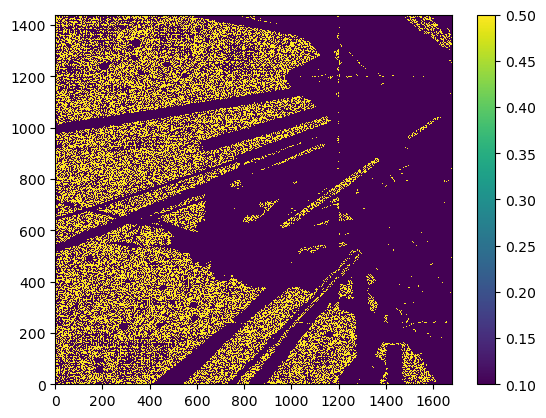

In [8]:
plt.pcolormesh(np.mod(sb.data,1), vmin=0.1)
plt.colorbar()

In [9]:
sb = pygmt.datasets.load_earth_relief(resolution='01m', region=region, data_source='igpp')
sb.plot()
#plt.pcolormesh(np.mod(sb.data,2))
#plt.colorbar()


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.5.5 at 01x01 arc minutes reduced by Gaussian Cartesian filtering (1.9 km fullwidth) [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 30x30 degree grid tile (earth_relief_01m_g): S60E120


KeyboardInterrupt: 

In [ ]:
#import xarray as xr
#da = xr.load_dataarray('/Users/simon/Data/GMTdata/VGG22/topo_25.1.nc')

plt.pcolormesh(np.mod(da.data[5800:6000,5800:6000],2))
#plt.hist(np.mod(da.data[5800:6000,5800:6000].flatten(),2))
plt.colorbar()
